<a href="https://colab.research.google.com/github/friyk/DSL-30.110/blob/main/T02/T02_Basys3_StopWatch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# T02: Stopwatch on Basys 3

|Group members|Student ID|
|---|---|
|Chua Kevin Subong|1007002|
|Kaung Khant Htet|1003437|
|Ng Au Hern Wesley|1006888|
|Pan Ziyue|1006658|
|Shum Hei Lam|1009861|

## Objective:


Design and implement a **stopwatch** on the **Basys 3 FPGA** board using Verilog, making use of the **4-digit** **7-segment** display LEDs for time display. The stopwatch should have the following features:  
1. **Reset functionality**: Press a button (e.g., `btnR`) to restart the stopwatch.  
2. **Time Display**: Display the elapsed time in minutes and seconds on the 4-digit 7-segment display.  
3. **Update Frequency**: Update the display at a reasonable frequency (e.g., every 1 second).

## Instructions  

### FPGA Project  
1. Create a new Vivado project for the Basys 3 FPGA board.  
2. Write Verilog code to implement the stopwatch logic.  
3. Map the Verilog design to the Basys 3 board's resources via the basys3 [constraint file](./Demo_Code/basys3_template.xdc) (`.xdc`).   
4. Generate the bitstream file.
5. Program the FPGA board with the bitstream.  
6. Test and debug your stopwatch design on the FPGA board to ensure correct functionality.  
7. Document your design, including the Verilog code, functional diagrams, and challenges faced during implementation.  
8. **Demo Vivado Project**: [T02_Basys3_StopWatch](./Demo_Code/T02_Basys3_StopWatch)

## Simulation


- [Verify functionality using testbenches and waveform analysis.](Simulation/simT02_Basys3_StopWatch_SSD.ipynb)  




### Additional Challenge (*Optional*):

  
Add features like **pause/resume functionality** to the stopwatch design.  

## Submission:


*This is a group work. Only one member needs to submit the materials.*  
1. A self-contained `ipynb` file which:  
   - **Google Colab link** and **GitHub link**.  
   - **Verilog codes** (module, testbench, waveform, AI prompt, etc.).  
   - A **brief report** documenting the design, Python code (e.g., logic expressions, AI-generated code), challenges, and lessons learned;
2. A **demonstration video** (less than 1 minute, `.mp4` format).
* Submit to **edimension** and share with instructor GitHub: `pe8sutd`, `pe8sutd@gmail.com`.  
3. The report should report how AI is used in the design (if applicable). The guideline: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/pe8sutd/Colab_DSL_Practice25/blob/main/G01_Used_of_AI_in_Design.ipynb)


---

### Deadline:  
Refer to the due date in the **edimension submission folder**.  

---

### Grading:  
Based on:  
- Functionality of the stopwatch.  
- Clarity of Verilog code.  
- Quality of documentation.  
*Bonus points for additional features or creative implementations.*  

---



## Demo Video  


The following video below shows the stopwatch’s functionality on the Basys 3 board.

https://www.youtube.com/watch?v=eFecL3ZtbN0

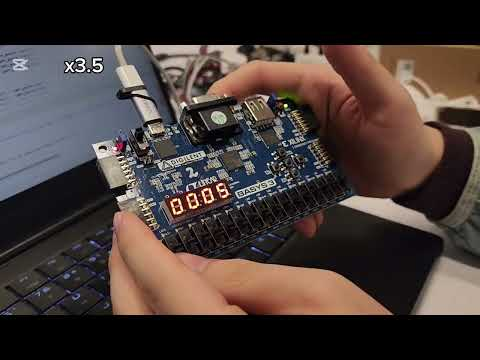

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('eFecL3ZtbN0')

## Design Report

Key features

- Reset button to restart the counter, but not start/stop it
- Start/Stop button to be able to resume/pause the timing.
- The timer counter itself is internally run at 1KHz, and is 32 bits wide, so 32'h00000001 is equivalent to 1 milisecond
- Time display module converts internal timer counter (miliseconds) into minutes and seconds for display

We have to develop the following modules for stopwatch to function correctly

- `debounce` Button conditioner: debounce button inputs
- `ssd` 7 Segment Driver: to drive the 7 segment display using BCD. This is already provided by lesson materials
- `clk_100M_to_1k` 100MHz to 1kHz Clock divider: to produce the 1ms period clock used to drive the internal stopwatch counter
- `tff` T-flip flop (TFF): to allow pausing the stopwatch by a single button press, connected to a multiplexor
- `ms_to_s` 32-bit ms to 16-bit seconds divider: this produces the raw number of seconds elapsed
- `s_to_mmss` 16-bit s to mm:ss divider: this produces the numerical outputs for minutes and seconds, which can then be encoded to BCD
- `min_to_bcd` 16-bit minutes to 2x4-bit BCD
- `sec_to_bcd` 16-bit seconds to 2x4-bit BCD

The inputs to our stopwatch is specified as follows:

- btnC: The centre button on the Basys 3 board, which starts/stops the stopwatch
- btcU: The up button on the Basys3 board, which resets the stopwatch